<a href="https://colab.research.google.com/github/AhmedElrifo/Investigate-a-Dataset/blob/master/investigate_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: Investigation of IMDB dataset



<a id='intro'></a>
## Introduction

> The dataset includes data about different shows throughout the history and it includes features like cast , name of the show ,genere , budget and revenue .
>
> 

1.   What is the most selling genere in the history?
2.   are the revenues of each year improving ?
3.   what are the people's choice each year ?
4.   What is the year with the biggest number of movies?
5.   which Company produced the biggest number of shows?



In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np 


<a id='wrangling'></a>
## Data Wrangling



In [49]:
df=pd.read_csv('/content/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [50]:
print(df.info(),'\n',df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Data wrangling and cleaning

In [52]:
# dropping unnecessary columns 
df=df.drop(columns=['imdb_id','homepage','tagline','overview'])

#dropping  rows null in keywords or production companies
df=df.dropna(subset=['keywords','production_companies'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8706 non-null   int64  
 1   popularity            8706 non-null   float64
 2   budget                8706 non-null   int64  
 3   revenue               8706 non-null   int64  
 4   original_title        8706 non-null   object 
 5   cast                  8681 non-null   object 
 6   director              8696 non-null   object 
 7   keywords              8706 non-null   object 
 8   runtime               8706 non-null   int64  
 9   genres                8702 non-null   object 
 10  production_companies  8706 non-null   object 
 11  release_date          8706 non-null   object 
 12  vote_count            8706 non-null   int64  
 13  vote_average          8706 non-null   float64
 14  release_year          8706 non-null   int64  
 15  budget_adj          

# making new rows with the values after ' | ' and replace it with the multi values rows

In [53]:
#making new rows with the values after ' | '


df=df.drop('keywords', axis=1).join(df['keywords'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('keywords'))




In [54]:
#making new rows with the values after ' | '
df=df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Thriller
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Action


In [55]:
# grouping data to find generes each year
df_group2=df[['genres','release_year','revenue']].sort_values(by=['release_year','revenue'],ascending=False).groupby(['release_year','genres'])['revenue'].sum()
df_group2.tail()

release_year  genres         
2015          Science Fiction    239917408842
              TV Movie                      0
              Thriller           186804894154
              War                 17279356006
              Western             17223492850
Name: revenue, dtype: int64

In [56]:

df_group=df.groupby(by=['release_year','genres',])['revenue'].sum().reset_index()

df_group.sort_values(by=['release_year','revenue'],ascending=False)

,release_year,genres,revenue
1014,2015,Adventure,336747794875
1013,2015,Action,313138051864
1027,2015,Science Fiction,239917408842
1029,2015,Thriller,186804894154
1016,2015,Comedy,165112820058
...,...,...,...
3,1960,Crime,0
6,1960,Fantasy,0
9,1960,Music,0
11,1960,Science Fiction,0


#Data Exploration and visualisation  

# What is the most selling genere in the history?

---



---



In [57]:
df_genere=df.groupby(by=['genres'])['revenue'].sum()
df_genere=df_genere.sort_index(ascending=False)
df_genere.index

Index(['Western', 'War', 'Thriller', 'TV Movie', 'Science Fiction', 'Romance',
       'Mystery', 'Music', 'Horror', 'History', 'Foreign', 'Fantasy', 'Family',
       'Drama', 'Documentary', 'Crime', 'Comedy', 'Animation', 'Adventure',
       'Action'],
      dtype='object', name='genres')

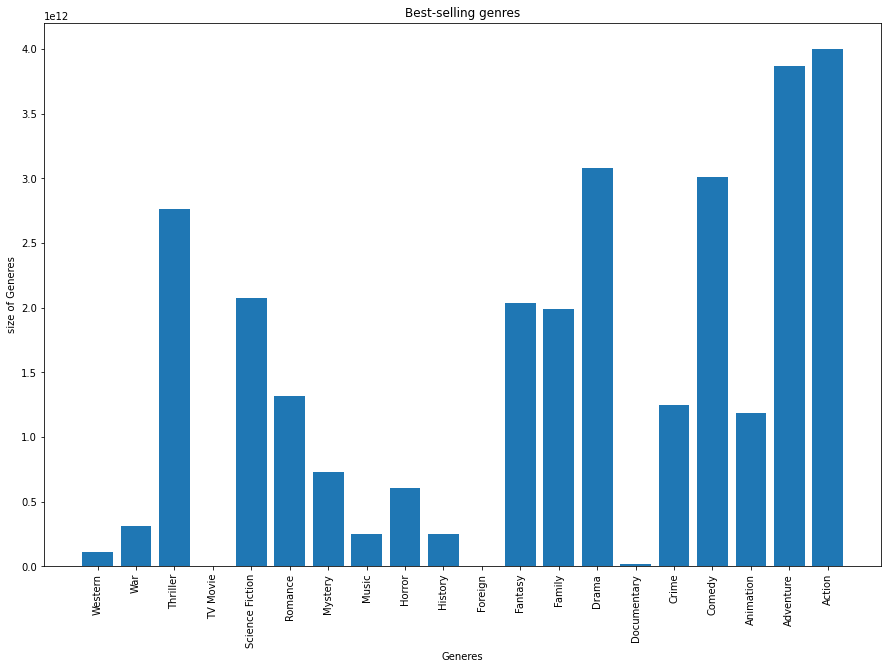

In [58]:
plt.figure(figsize=(15,10))
plt.bar(df_genere.index,df_genere)
plt.xticks(rotation=90)
plt.title('Best-selling genres')
plt.xlabel('Generes')
plt.ylabel('size of Generes')
plt.show()

### This means that the answer to our question is the action genere which is the most prefared throughout the history 

# Is there a relationship between popularity and 	budget?	 

In [59]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster,Action


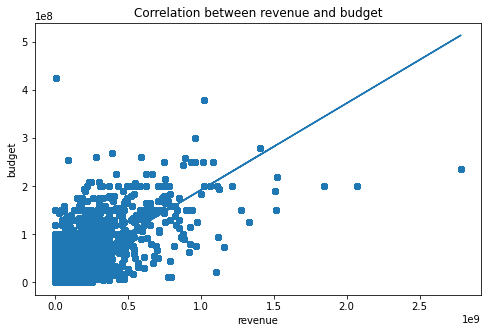

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(x='revenue',y='budget',data=df)
x=df['revenue']
y=df['budget']
m, b = np.polyfit(x,y,deg=1)
plt.plot(x, m*x + b)
plt.xlabel('revenue')
plt.ylabel('budget')
plt.title('Correlation between revenue and budget')
plt.show()

### As the line indicates they are positvely correlated 

# Are the revenues of each year improving ?

---



---



In [61]:
# answering the second question by using groupby and sum 
dfYear=df.groupby(by=['release_year'])['revenue'].sum()
dfYear=dfYear.sort_index(ascending=False)
dfYear

release_year
2015    1957464793275
2014    1673877736815
2013    1512702084406
2012    1703703692482
2011    1543069301124
2010    1359232775092
2009    1591026301250
2008    1150994388847
2007    1420540889436
2006    1135589954618
2005    1103222493098
2004    1132386699531
2003     952701541463
2002     949181843595
2001     911471109978
2000     625820747893
1999     719950530595
1998     611962988524
1997     749120595101
1996     575438532154
1995     683788696445
1994     477925214236
1993     447891050335
1992     443645820541
1991     346086900008
1990     382581417029
1989     325345619401
1988     234801682103
1987     218384908995
1986     174147390085
1985     185033373948
1984     173774806860
1983     150306398775
1982     177567004449
1981      84303742271
1980     106555448385
1979     108462196139
1978      71700520840
1977     135353723380
1976      42363525689
1975      62604835204
1974      49219664468
1973      74236409979
1972      23370806316
1971      294161615

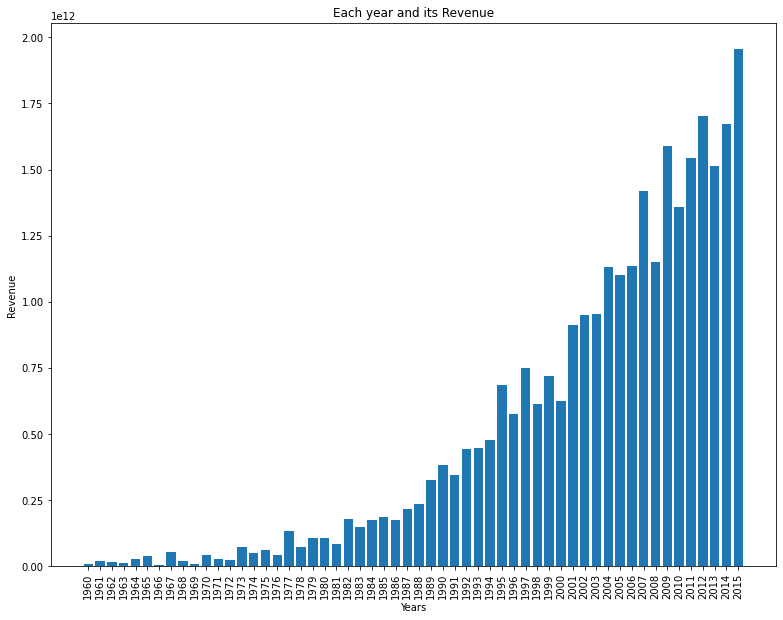

In [62]:

plt.figure(figsize=(13,10))
plt.bar(dfYear.index,dfYear)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.xticks(ticks=dfYear.index)
plt.ylabel('Revenue')
plt.title('Each year and its Revenue')
plt.show()

### this shows that the revenues in this industry are improving each year and some years it increases a lot !

# what are the people's choice each year ?

---




In [63]:
# this is to get the  most popular genere each year 
people=df_group.sort_values(by=['release_year'],ascending=False)
people=people.sort_values('revenue',ascending=False)
people

df_people=people.drop_duplicates('release_year',keep='first', ignore_index=True)
df_people[['release_year','genres']]

,release_year,genres
0,2015,Adventure
1,2014,Action
2,2012,Adventure
3,2009,Adventure
4,2013,Adventure
5,2011,Adventure
6,2010,Adventure
7,2007,Adventure
8,2003,Action
9,2004,Adventure


### The result shows that Adventues is the most prefared then action in years 2005 to 2015

In [64]:
# to exporting it to the Report 
df_people[['release_year'	,'genres']].to_csv('geners_each_year.csv')

# What is the year with the bigges number of movies 

In [65]:

no=df.groupby('release_year')['id'].count()




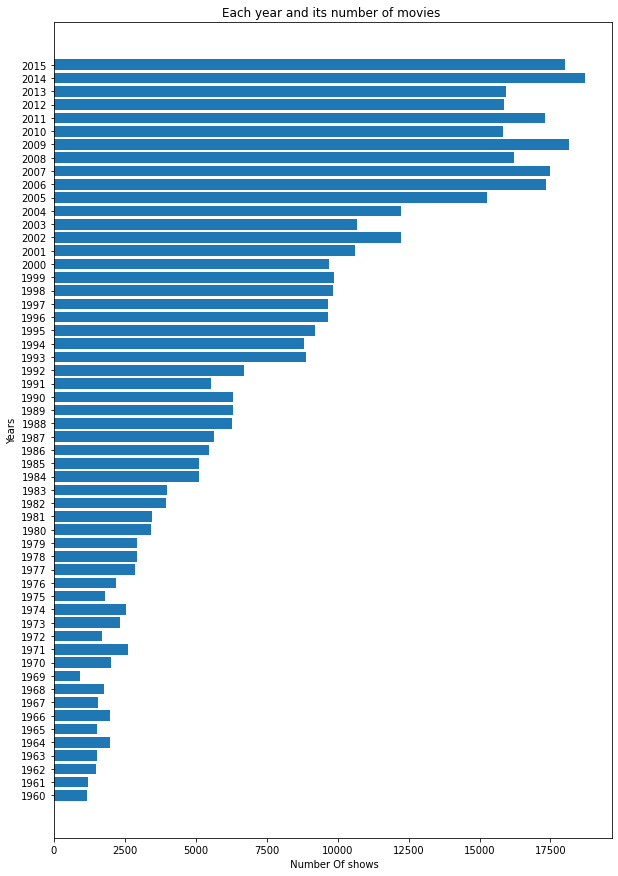

In [66]:
plt.figure(figsize=(10,15))
plt.barh(no.index,no)
plt.yticks(ticks=no.index)
plt.ylabel('Years')
plt.xlabel(' Number Of shows')
plt.title('Each year and its number of movies ')
plt.show()

### the figure above indicates that year 2014 is the year with the biggest number of shows 

# which Company produced the biggest number of shows?

---



---



In [67]:
df['production_companies'].value_counts()

Paramount Pictures                                                              7541
Universal Pictures                                                              6206
Columbia Pictures                                                               4014
Warner Bros.                                                                    3477
Walt Disney Pictures                                                            3303
                                                                                ... 
Passion Pictures|Cutler Productions                                                1
Paramount Pictures|Famous Films (II)                                               1
Sony Pictures Animation|NEST Family Entertainment|Crest Animation Production       1
Lucasfilms                                                                         1
AdScott Pictures                                                                   1
Name: production_companies, Length: 6626, dtype: int64

In [68]:
#dfprod=df.drop('production_companies', axis=1).join(df['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies'))
dfprod=df['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies')

In [69]:
dfproduction=dfprod.value_counts()
dfproduction=dfproduction.iloc[0:5]
dfproduction=dfproduction/dfproduction.sum() *100
dfproduction

Warner Bros.                              25.697463
Universal Pictures                        24.768128
Paramount Pictures                        21.010179
Twentieth Century Fox Film Corporation    14.885979
Columbia Pictures                         13.638251
Name: production_companies, dtype: float64

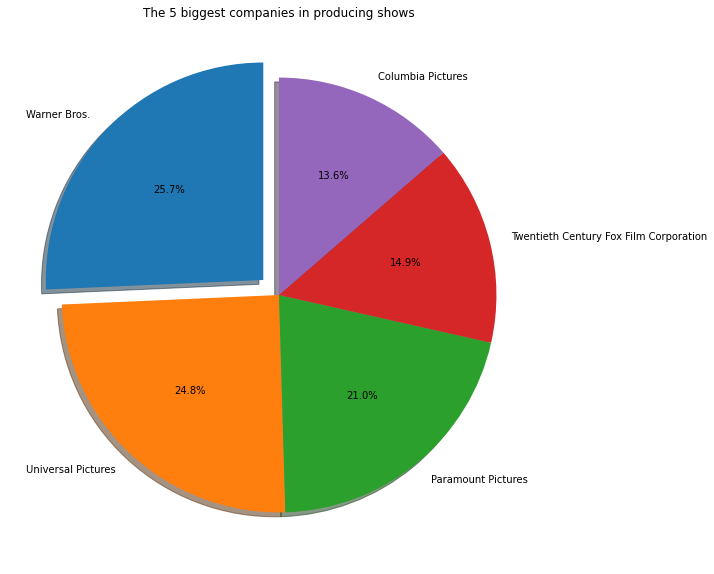

In [70]:

plt.figure(figsize=(10,10))
explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(dfproduction,labels =dfproduction.index, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

plt.title('The 5 biggest companies in producing shows')
plt.show()

# This Shows that Warner Bros which has produced 25.7% of shows is the biggest company in production ! 


## Conclusions

These are the answers to our questions :
*   The most selling genre in the history is Action
*   Budget and revenue are positevly correlated
*   The revenue of th industy of movie production is always increasing and improving
*   2014 is the year with the biggest number of movies production
*   Warner Bros is the biggest company in producing movies in the history with propotion of 25.7% of the total production 

## Limitations
The data wasn't ready and had many null values and many irrelevant feature which i had to remove .Also features like  Genres and Company production are multivalued so i had to split them .The data is not idicationg the money was in which currency either .But all of these limitations won't badly affect our analysis and findings.




